# Education Data Processing 

* Transform dependent data that is relevant to the prediction of wealth, denoted T(num_transform)
* Discard data useless in the prediction of wealth
* Keep independent and relevant data

For each of these methods, replace NaN values with what makes sense for each col

In [3]:
import pandas as pd
import os, sys
import matplotlib.pyplot as plt


In [4]:
new_dir = '/Users/juanbello/Desktop/Kaggle'

sys.path.append(os.path.join(new_dir))

# Load the ed dataset
df = pd.read_csv('ed_train_transform.csv') # education

# Replacing NaN's


### Which columns can be replaced by a zero?

* Categorical answered-questions for which zero is not one of the categories. By replacing them with a zero, we are implicitly adding an additional category for "No response"
  
* We need to make sure zero is not a feasible value in the column. otherwise it already means something and we need a new indicator. We also need to make sure it is categorical, if a column is numeric and we add a value of zero, then that doesnt make sense, add the average instead. 

## Q1 and Q2
* Q1: reading 
* Q2: Writing
### Merge into T1: "Can read and write perfectly" binary variable.
* 1 if you can read and write perfectly
* 0 ow 


In [8]:
flt = df['ED_Q01'].eq(df['ED_Q02']) & df['ED_Q01'].eq(1)

df.loc[flt, 'ED_T1'] = 1
df.loc[~flt, 'ED_T1'] = 0
# df[['Q01', 'Q02', 'T1']]

df =  df.drop(columns=['ED_Q01', 'ED_Q02'])
## how about 1 if you can read and write perfectly? 


In [9]:
assert(len(df[df['ED_T1'].isna()])==0) # T1 has no NaN values

# T2 = f(Q3,Q6)

3)	Has [Name] ever attended school?									
4)	What is the highest LEVEL [Name] have completed in school? In which level?									
5)   In the LEVEL of q4, what grade?									
6)	What is the highest diploma [Name] have attained?									

Action: 

* Set T2 = Standarize 4 = level of education
* Get rid of 3, 5, and 6



In [11]:
# studied aborad doesn't seem that useful, IGNORE.
# studied_abroad = df['Q04'].eq(7) | df['Q04'].eq(9) | df['Q04'].eq(11)
# df.loc[studied_abroad, ['poverty_score', 'Q04']]['poverty_score'].mean()

In [12]:
# df.loc[df['ED_Q04'].isna() & ~df['ED_Q06'].isna()] # size 0

In [13]:
# Standarize Q4 before fillion out NaN values
Q4_education_mapping = [0, 1, 2, 3, 4, 4, 5, 5, 6, 6, 7, 7] # just gives the same values to same degrees (no matter where they were studied)
df['ED_T2'] =  df['ED_Q04'].apply(lambda indx : indx if pd.isna(indx) else Q4_education_mapping[int(indx)])

## fill out NaN values with standarized mean
mean = int(df['ED_T2'].mean())
df['ED_T2'] = df['ED_T2'].fillna(mean)

df =  df.drop(columns=['ED_Q03', 'ED_Q04', 'ED_Q05', 'ED_Q06'])

In [14]:
assert(len(df[df['ED_T2'].isna()])==0)


# Keep Q7 as is
It just becomes T3 to keep some consistency and order

In [16]:
df['ED_T3'] = df['ED_Q07']
df = df.drop(columns=['ED_Q07'])

In [17]:
df

,uid,ED_Q08,ED_Q09,ED_Q10,ED_Q11,ED_Q12,ED_Q13,ED_Q14,ED_Q15,ED_Q16,...,ED_Q61,ED_Q62,ED_Q63,ED_Q64,ED_Q65,ED_Q66,poverty_score,ED_T1,ED_T2,ED_T3
0,441_2_3,1.0,1.0,NaN,NaN,6.0,1.0,1.0,1.0,NaN,...,2.0,NaN,NaN,2.0,NaN,3.0,4.0,1.0,2.0,0.0
1,647_7_1,1.0,1.0,NaN,NaN,2.0,3.0,1.0,1.0,NaN,...,2.0,NaN,NaN,2.0,NaN,1.0,4.0,1.0,2.0,0.0
2,756_4_1,1.0,1.0,NaN,NaN,6.0,1.0,1.0,1.0,NaN,...,2.0,NaN,NaN,2.0,NaN,4.0,6.0,1.0,2.0,0.0
3,25_4_3,1.0,1.0,NaN,NaN,6.0,2.0,1.0,1.0,NaN,...,2.0,NaN,NaN,2.0,NaN,3.0,4.0,1.0,5.0,2.0
4,132_6_3,1.0,1.0,NaN,NaN,6.0,1.0,1.0,1.0,NaN,...,2.0,NaN,NaN,2.0,NaN,5.0,3.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,574_5_1,2.0,NaN,NaN,13.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,1.0
5330,618_2_1,2.0,NaN,NaN,13.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,1.0,1.0
5331,155_4_1,2.0,NaN,NaN,13.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.0,0.0
5332,475_5_1,2.0,NaN,NaN,13.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1.0,2.0


## Mergining Q8-11 and Q14-17
about attending school
* Q8 Did you enroll this year?									
* Q9 will you attend this year?									
* Q10 Why not attending this year?							
* Q11 Why not enrolling this year?

Funny situations:
enrolled but will not attend. We can only care about attending. 

Our aggregation variable could be a merge of "why not attending/enrolling or attending"

After merging all 4 columns into one, we may need to further break down, transform the categories... maybe get rid of anything that is not about money (illness, poor quality of teaching, )

In [19]:
# Rename for sanity:
## 'now' is this year
## 'past' is last year
df['now_enrolled'] = df['ED_Q08']  # 1 yes, 2 No
df['now_attending'] = df['ED_Q09'] # 1 yes, 2 No
df['past_enrolled'] = df['ED_Q14']  # 1 yes, 2 No
df['past_attending'] = df['ED_Q15'] # 1 yes, 2 No

In [20]:
df =  df.drop(columns=['ED_Q08', 'ED_Q09','ED_Q14', 'ED_Q15']) 

In [21]:
# Merge now_enrolled, now_attending, past_enrolled, past_attending into "missed at least a year in the past 2"

# We have situations where someone enrolls but does not attend.
# We don't have situations when someone who did not enroll attends. 
# So use attend as base truth and fill some of the NaNs with enrolled.
df['now_attending'] = df['now_attending'].fillna(df['now_enrolled'])
df['past_attending'] = df['past_attending'].fillna(df['past_enrolled'])

# We only care if they missed at least one year in the past 2.
missed_year = df['now_attending'].eq(2) | df['past_attending'].eq(2) 
df.loc[missed_year, 'Missed_year'] = True
df.loc[~missed_year, 'Missed_year'] = False


In [22]:
df =  df.drop(columns=['now_enrolled', 'past_enrolled', 'past_attending', 'now_attending'])


In [23]:
# Merge not attending and not enrolling reason in school 
df['now_not_attend_reason'] = df['ED_Q10']
df['now_not_enroll_reason'] = df['ED_Q11']
df['past_not_attend_reason'] = df['ED_Q16'] 
df['past_not_enroll_reason'] = df['ED_Q17']


# first make 'attend' reasons equivalent:
## the values of Q10 and Q11 match except for Q10=13 <-> Q11=14. So, Q10=13 should be transformed into Q10'=14 before merging 
## the values of Q16 and Q17 match except for Q16=13 <-> Q17=14. So, Q16=13 should be transformed into Q16'=14 before merging 

df.loc[df['now_not_attend_reason'] == 13, 'now_not_attend_reason'] = 14
df.loc[df['past_not_attend_reason'] == 13, 'past_not_attend_reason'] = 14

# We have situations where someone enrolls but does not attend.
# We don't have situations when someone who did not enroll attends. 
# So use attend as base truth and fill some of the NaNs with enrolled.
df['now_not_attend_reason'] = df['now_not_attend_reason'].fillna(df['now_not_enroll_reason'])
df['past_not_attend_reason'] = df['past_not_attend_reason'].fillna(df['past_not_enroll_reason'])

# Some may still be NaN


In [24]:
df = df.drop(columns=['ED_Q10', 'ED_Q11', 'ED_Q16', 'ED_Q17'])

In [25]:
df = df.drop(columns=['now_not_enroll_reason', 'past_not_enroll_reason'])

#### Conciliating reasons

Now we are interested in how we will merge/reconcile the case when someone did not attend school two years in a row for DIFFERENT REASONS. 
We'll first convert the reasons to a financial scale of 1-3. 

* 1 Is a non-financial reason.
* 2 Somewhat financial.
* 3 Directly financial reason. 

Then we just take the maximum number on the financial scale as our main reason.

the mapping of reason 1-13 -> how related that reason is to money on a scale of 1-3 is as follows: 

[Nan, 1, 2, 3, ..., 14] -> [0, 3,1,3,3,1,1,1,2,2,1,1,2,1,1]




In [27]:
# NOTE since going to school  is kind of the opposite of being poor, we will assign  NaN reason values a mapping of 0
df['now_not_attend_reason'] = df['now_not_attend_reason'].fillna(0)
df['past_not_attend_reason'] = df['past_not_attend_reason'].fillna(0)

In [28]:
# Now apply transform reasons to the financial scale
ABSENCE_REASON_TO_MONEY_MAPPING = [0, 3,1,3,3,1,1,1,2,2,1,1,2,1,1]

df['now_not_attend_reason'] =  df['now_not_attend_reason'].apply(lambda indx : ABSENCE_REASON_TO_MONEY_MAPPING[int(indx)])
df['past_not_attend_reason'] =  df['past_not_attend_reason'].apply(lambda indx : ABSENCE_REASON_TO_MONEY_MAPPING[int(indx)])

In [29]:
# Now the merge between now_not_attend_reason and past_not_attend_reason becomes obvious for our purposes of predicting wealth: pick the maximum. 
df['not_attend_reason'] =  df.apply(lambda row: max(row['past_not_attend_reason'], row['now_not_attend_reason']), axis=1)


In [30]:
df = df.drop(columns=['now_not_attend_reason', 'past_not_attend_reason'])

In [31]:
# Now we need to merge Missed_year? and not_attend_reason into one variate

## CLAIM: Missed_year==False <-> not_attend_reason=0
claim = df['Missed_year'].eq(False) & df['not_attend_reason'].ne(0)
assert(len(df[claim])==0)

## DONE: So they are already dependent!! No need to do anything other than delete missed_year?
df['ED_T4'] = df['not_attend_reason'] 

# The meaning of this not_attend_reason variable in the FINAL TRANSFORM ED_T4 is: 
# It represents what happened in the last couple of years
# 0 if the kid attended both years to school
# 1 if the kid missed at least one year due to something, in the worse case scenario, (NOT) related to money
# 2 if the kid missed at least one year due to something, in the worse case scenario, (SOMEWHAT) related to money
# 3 if the kid missed at least one year due to something, in the worse case scenario, (DIRECTLY) related to money


In [32]:
df = df.drop(columns=['Missed_year', 'not_attend_reason'])

# T5 = f(Q19)
As is.
"IS [NAME] 19 YEARS OLD OR LESS?"

Q9 values: 
2 = No, 
1 = Yes

New scale:

* -1 = No
* 0 = No data (NaN)
* 1 = Yes

In [34]:
df['ED_T5'] = df['ED_Q19']
df = df.drop(columns=['ED_Q19'])


In [35]:
# Now get rid of the NaN
df['ED_T5'] = df['ED_T5'].fillna(0)

In [36]:
# And change the scale
df.loc[df['ED_T5']==2, 'ED_T5'] = -1

# T6 = f(Q23)

Q23: Is the school that [Name] attend in public or private?

* PUBLIC	= 1
* PRIVATE RELIGIOUS	= 2
* PRIVATE NON-RELIGIOUS	= 3

I like this ordering, apparently "Non-religious private schools are more expensive than religious private schools on average"

NaN replacement: 
AVERAGE because average assigns a more conservative value to NaN. A zero on this new scale is still the 25th quantile so it is biased towards poverty ya know.

In [38]:
mean = int(df['ED_Q23'].mean())
df['ED_T6'] = df['ED_Q23'].fillna(mean)

# T7 = f(Q28, Q29)
Modes of transportation

### I am not sure about this one, include for now

Q28: Means of transportation
* WALK = 1
* BICYCLE = 2
* ANIMAL =3
* CAR = 4	
* BUS = 5	
* TRAIN = 6	
* OTHER(SPECIFY) = 7

Q29:
Amount spent per month on transportation

This could be misleading, maybe you reported spending 0 on transportation but only cuz you take your dad's Aston Martin

In [40]:
# # complete_units = ~df['ED_Q29'].isna() & ~df['ED_Q28'].isna() # very small
# complete_Q28 = ~df['ED_Q28'].isna()

# data = df.loc[complete_Q28, ['ED_Q28', 'poverty_score']]

# walkers = data[data['ED_Q28'] == 1]
# bikers = data[data['ED_Q28'] == 2]
# car_riders = data[data['ED_Q28'] == 4]
# bus_takers = data[data['ED_Q28'] == 5]
# train_takers = data[data['ED_Q28'] == 6]

# print(walkers['poverty_score'].mean())
# print(bikers['poverty_score'].mean())
# print(car_riders['poverty_score'].mean())
# print(bus_takers['poverty_score'].mean())
# print(train_takers['poverty_score'].mean())
# plt.hist(data_subset['poverty_score'], bins=5, color='blue', edgecolor='black', alpha=0.7)
## anything else (Animal, Other, NaN) can take average.



In [41]:
# Lets do a mapping on Q28 based on average poverty score orderings:
# bikers < walkers < bus_takers < car_riders
# 2	1	NaN	4	3	NaN	Nan
transportation_mapping = [float('nan'), 2, 1, float('nan'), 4, 3, float('nan'), float('nan')]


df['ED_T7'] = df['ED_Q28'].apply(lambda indx: indx if pd.isna(indx) else transportation_mapping[int(indx)] )
av = int(df['ED_T7'].mean())
df['ED_T7'] = df['ED_T7'].fillna(av)

In [42]:
df = df.drop(columns = ['ED_Q28', 'ED_Q29'])

In [43]:
# ## Q29, amount spent per month seems irrelevant. 
# complete_Q29 = ~df['ED_Q29'].isna()

# data = df.loc[complete_Q29, ['ED_Q29', 'poverty_score']]

# plt.scatter(data['ED_Q29'], data['poverty_score'], color='blue', s=100, alpha=0.7, edgecolor='black')

# f(Q30, Q31)
Q30: Have [Name] received a transportation subsidy in this academic year? 	

Q31: What was the value of the transportation subsidy for the previous academic year?	

### DELETE BOTH


In [45]:
# Do the numerical amounts of Q31 tell you something about poverty_score?
complete_units = ~df['ED_Q31'].isna() 

data = df.loc[complete_units, ['ED_Q31', 'poverty_score']]
# HAHA no one received transportation subsidies. DELETE
assert(len(df[df['ED_Q30']==1])==0)

In [46]:
df = df.drop(columns=['ED_Q30', 'ED_Q31'])

# Q32-Q40

### delete 32, make sure Q41= sum(Q33-40)

In [48]:
df['sum'] = df[['ED_Q33', 'ED_Q34', 'ED_Q35', 'ED_Q36', 'ED_Q37', 'ED_Q38', 'ED_Q39', 'ED_Q40']].sum(axis=1)
cond = ~df['sum'].le(df['ED_Q41']) & ~df['ED_Q41'].isna()  ## ED_Q40 is always larger, at least in testing data.
assert(len(df.loc[cond, ['sum', 'ED_Q41']])==0)
# so yes, we are good to delete away

In [49]:
df = df.drop(columns=['ED_Q32', 'ED_Q33', 'ED_Q34', 'ED_Q35', 'ED_Q36', 'ED_Q37', 'ED_Q38', 'ED_Q39', 'ED_Q40'])

# T8 = f(Q41)

Total spent on education in past year

replace Nan with averages

In [51]:
av = int(df['ED_Q41'].mean())
df['ED_T8'] = df['ED_Q41'].fillna(int(av))

In [52]:
df = df.drop(columns=['ED_Q41'])

# Q42-46, 48 DELETE

In [54]:
df = df.drop(columns=['ED_Q42', 'ED_Q43', 'ED_Q44', 'ED_Q45', 'ED_Q46', 'ED_Q48'])

# f(Q47, Q49)

47	How much was the value of the subsidy claimed?

49	How much did [Name] receive in the textbook subsidy rebate?	

## Delete both

In [56]:
# Do the numerical amounts of 49 tell you something about poverty_score?
complete_units = ~df['ED_Q49'].isna() 

data = df.loc[complete_units, ['ED_Q49', 'poverty_score']]
assert(len(df[df['ED_Q47']==1])==0)
# Also nothing

In [57]:
df = df.drop(columns=['ED_Q47', 'ED_Q49'])

# f(54, 56)

54 Is [Name] paying for the tutoring?

56	How much has [Name] spent per month on average for this tutoring in the previous academic year?									

In [59]:
complete_units = ~df['ED_Q56'].isna() 

data = df.loc[complete_units, ['ED_Q56', 'poverty_score']]
# df[df['ED_Q54']==1]
# Only one guy paying for tutoring and he has a poverty score of 3? interesting. get rid of Q54,Q56


In [60]:
df = df.drop(columns=['ED_Q50', 'ED_Q51', 'ED_Q52', 'ED_Q53', 'ED_Q54', 'ED_Q55', 'ED_Q56'])

# f(57-61)


In [62]:
# try 60
complete_units = ~df['ED_Q60'].isna() 

data = df.loc[complete_units, ['ED_Q60', 'poverty_score']]
# data
# nothing. 

In [63]:
df = df.drop(columns=['ED_Q57', 'ED_Q58', 'ED_Q59', 'ED_Q60', 'ED_Q61'])

# f(62,63)


In [65]:
complete_units = ~df['ED_Q62'].isna() 
data = df.loc[complete_units, ['ED_Q62', 'poverty_score']]
data # doesn't add much, you could argue it does but not necessart 

,ED_Q62,poverty_score
7,5.0,7.0
193,3.0,3.0


In [66]:
complete_units = ~df['ED_Q63'].isna() 
data = df.loc[complete_units, ['ED_Q63', 'poverty_score']]
data

,ED_Q63,poverty_score
7,10.0,7.0
193,4.0,3.0


# f(64, 65)

No one has a "yes"

In [68]:
complete_units = ~df['ED_Q64'].isna() & df['ED_Q64'].eq(1) 
data = df.loc[complete_units, ['ED_Q64', 'poverty_score']] # no one

complete_units = ~df['ED_Q65'].isna() 
data = df.loc[complete_units, ['ED_Q65', 'poverty_score']] # two people

# f(66)

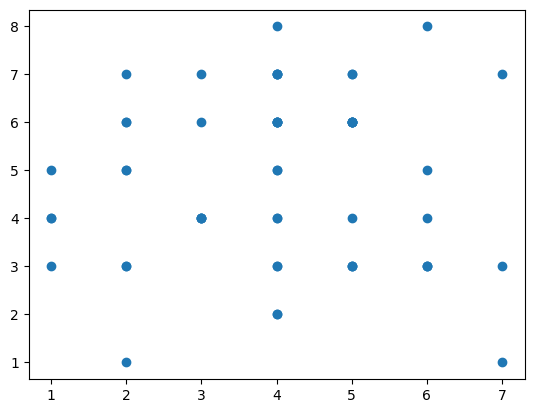

In [70]:
complete_units = ~df['ED_Q66'].isna()  
data = df.loc[complete_units, ['ED_Q66', 'poverty_score']]

plt.scatter(data['ED_Q66'], data['poverty_score']) # seems stationary

In [71]:
df = df[['uid', 'ED_T1', 'ED_T2', 'ED_T3', 'ED_T4', 'ED_T5', 'ED_T6', 'ED_T7', 'ED_T8', 'poverty_score']]

In [72]:
df

,uid,ED_T1,ED_T2,ED_T3,ED_T4,ED_T5,ED_T6,ED_T7,ED_T8,poverty_score
0,441_2_3,1.0,2.0,0.0,0,0.0,1.0,2.0,140000.0,4.0
1,647_7_1,1.0,2.0,0.0,0,0.0,1.0,2.0,75000.0,4.0
2,756_4_1,1.0,2.0,0.0,0,0.0,1.0,2.0,100000.0,6.0
3,25_4_3,1.0,5.0,2.0,0,0.0,3.0,2.0,730000.0,4.0
4,132_6_3,1.0,2.0,0.0,0,0.0,1.0,1.0,170000.0,3.0
...,...,...,...,...,...,...,...,...,...,...
5329,574_5_1,1.0,1.0,1.0,1,-1.0,1.0,2.0,754438.0,4.0
5330,618_2_1,0.0,1.0,1.0,1,-1.0,1.0,2.0,754438.0,2.0
5331,155_4_1,1.0,1.0,0.0,1,-1.0,1.0,2.0,754438.0,5.0
5332,475_5_1,1.0,1.0,2.0,1,-1.0,1.0,2.0,754438.0,3.0


In [73]:
df.to_csv('./final_transforms/ed_train.csv', index=False)
